cuda check


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


packages

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 30.3 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

colored to grayscale


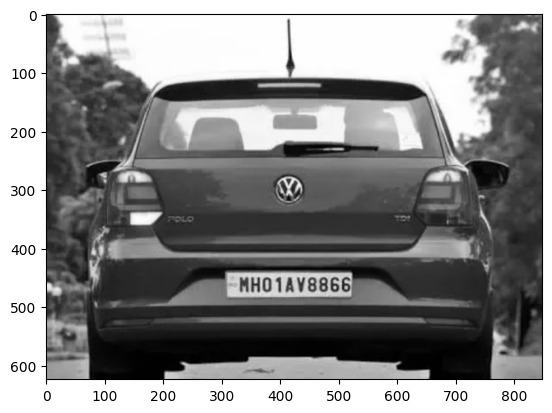

In [ ]:
img=cv2.imread('/content/sample4.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

filter & edge detection

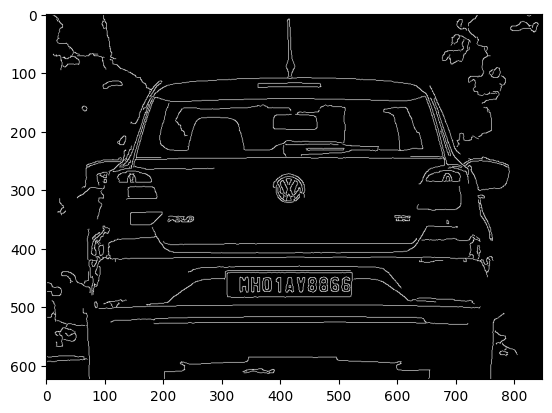

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #noise reduction
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

find contour, apply mask

In [ ]:
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [ ]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
print(location)

[[[309 443]]

 [[310 483]]

 [[522 479]]

 [[521 441]]]


In [ ]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

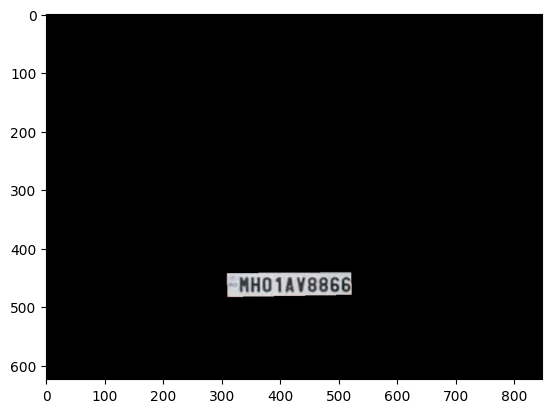

In [ ]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped=gray[x1:x2+1, y1:y2+1]

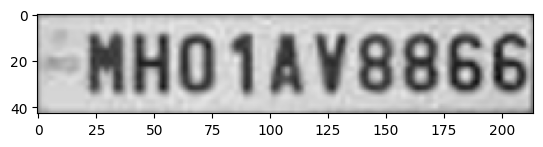

In [ ]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

easy ocr to read text

In [ ]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[15, 1], [214, 1], [214, 41], [15, 41]], 'Mho1av8866', 0.28593206407651633)]

plotting result

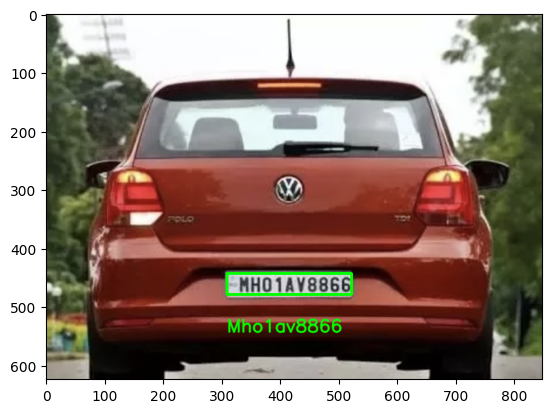

In [ ]:
text=result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale=1, color =(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
